# Project 7: Predicting the concrete compressive strength

Team members:
1. Shrrivatsan Paramasivam - 465985
2. Sangita Conjeevaram Viswanathan - 468855
3. Priya Bhamidipati - 459805
4. Varshini Gayathri Suresh - 469038
5. Praveen Raj Balakrishnan - 467394

Concrete as a building material is classified as either normal or high strength based on its compressive strength. Compressive strength refers to the property of a material, such as concrete, that measures its ability to withstand a compressive force without breaking or deforming. In the context of concrete mixes, the compressive strength is commonly measured on 100 mm concrete cubes.

Machine learning (ML) models are increasingly used to predict the compressive strength of concrete due to their efficiency and accuracy compared to traditional testing methods. Traditional methods involve producing and testing physical samples, which are time-consuming, costly, and prone to variability. ML models, on the other hand, can analyze large datasets and predict compressive strength based on various parameters, offering a faster, more cost-effective, and non-destructive alternative. This approach also allows for better optimization of concrete mix designs, contributing to more efficient and sustainable construction practices

The aim of this project is to build a machine learning model to predict the compressive strength of concrete.



**About the dataset**

The dataset used for this analysis is the Concrete Compressive Strength dataset from the UC Irvine Machine Learning Repository. This dataset contains 1,030 instances and 9 attributes, which represent various factors influencing concrete's compressive strength. The dataset includes the following input features: cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and age. The target variable is the compressive strength of the concrete, measured in megapascals (MPa). Understanding the relationship between these features and the concrete's compressive strength is critical for optimizing concrete production and ensuring its desired quality for construction projects.


**Methodology**

Feature selection is implemented into the datasets, to improve model performance by reducing overfitting, improving accuracy, speeding up training, and simplifying the model by removing irrelevant or redundant features. After Feature selection, Regression Supervised Machine Learning technique has been utilized to predict the continuous value of compressive strength. In supervised learning, the model is trained on a labelled dataset, meaning that both the input features and the corresponding output (target variable) are provided. The goal is to learn a mapping from inputs to outputs so that the model can make accurate predictions on new, unseen data. Specifically, Linear, Quadratic, Ridge and Lasso Regression models have been used to for the prediction of the model.



In [ ]:
pip install xlrd==2.0.1

In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Loading, inspecting, and analyzing a dataset

  The analysis begins with the importation of essential libraries, including Pandas for data manipulation, NumPy for numerical calculations, and Matplotlib and Seaborn for data visualization. These libraries enable efficient handling of tabular data, mathematical computations, and graphical representation of trends within the dataset.
  
  Once the necessary libraries are imported, the dataset is loaded from an Excel file (Concrete_Data.xls) into a Pandas DataFrame. This step ensures that the data is structured and accessible for further analysis. The dataset is expected to contain numerical and categorical values relevant to concrete properties, including various raw materials and their respective proportions, as well as the compressive strength of the resulting concrete mixtures.

  To verify the successful loading of the dataset and gain an initial understanding of its structure, the first five rows of the dataset is viewed. This allows for a preliminary inspection of column names, data types, and sample values, ensuring that the dataset is correctly formatted before proceeding with deeper analysis.



In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualization
d = pd.read_excel('Concrete_Data.xls') # Load the file
# View the first few rows
d.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Through this inspection, it becomes evident that the dataset consists of multiple raw materials, including cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate, each playing a role in concrete formation.

## Dataset Inspection

The dataset's key characteristics are inspected to ensure it is properly structured and formatted for analysis.


In [ ]:
# Inspect the data
# Check for data types and missing values
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## Summary Statistics

The summary statistics for the dataset provides insights into the distribution, central tendencies, and variability of each numerical variable. The mean represents the average value for each column, offering a general measure of central tendency, while the standard deviation (std) reflects the extent to which values deviate from the mean, providing an indication of variability.

The minimum (min) and maximum (max) values highlight the range of each feature, showing the smallest and largest values recorded in the dataset. The 25th percentile (1st quartile) represents the value below which 25% of the observations fall, whereas the 50th percentile (median or 2nd quartile) marks the middle value, effectively splitting the dataset into two halves. The 75th percentile (3rd quartile) represents the value below which 75% of the data points lie, helping to understand the spread and distribution of the values.


In [ ]:
# Get summary statistics
d.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Viewing the Column Names

Viewing the column names of the data frame, allows for a quick inspection of the dataset's structure. This is particularly useful when working with large datasets where manually checking column names is impractical. By listing all available columns, it provides an overview of the dataset’s features, making it easier to navigate and analyze.

Verifying the column names is essential to ensure that the dataset has been loaded correctly. Sometimes, datasets may contain unexpected spaces, special characters, or inconsistent naming conventions, which can lead to errors during data manipulation. By displaying the column names, any formatting issues can be identified and corrected before proceeding with further analysis.

Additionally, knowing the exact column names helps when performing various operations such as filtering, renaming, or selecting specific columns for analysis. Incorrectly referencing a column due to a spelling error or an unexpected character can lead to execution errors or incorrect results.


In [ ]:
# Viewing the column names
print(d.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


## Fixing Formatting Issues

Fixing formatting issues in column names is essential when working with datasets, as they may contain leading or trailing spaces due to data entry errors or formatting inconsistencies. These unnecessary spaces can cause issues when selecting, filtering, or renaming columns, leading to execution errors or incorrect data manipulation.

Fixing this issue improves code reliability by ensuring that column names match exactly when used in further analysis. A properly formatted dataset enhances efficiency in data handling, reducing potential errors and making operations such as filtering, merging, and renaming more seamless and error-free.

In [ ]:
# Remove leading and trailing spaces from column names
d.columns = d.columns.str.strip()

# Check the corrected column names
print(d.columns)

-------------------------------------------------------------------------
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')
----------------------------------END------------------------------------


## Renaming the Columns

 By renaming columns, the dataset becomes cleaner and more structured, making it easier to work with. Shorter and more intuitive column names help prevent unnecessary errors that may arise from long or complex names, improving the accuracy of data manipulation.










In [ ]:
# Rename the column directly
d.rename(columns={'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
                  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Slag',
                  'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly_Ash' ,
                  'Water  (component 4)(kg in a m^3 mixture)' : 'Water' ,
                  'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'SP',
                  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse',
                  'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine' ,
                  'Age (day)' : 'Age' ,
                  'Concrete compressive strength(MPa, megapascals)' : 'CS'}, inplace=True)

# Verify the change
print("-------------------------------------------------------------------------")
print(d.columns)
print("----------------------------------END------------------------------------")

-------------------------------------------------------------------------
Index(['Cement', 'Slag', 'Fly_Ash', 'Water', 'SP', 'Coarse', 'Fine', 'Age',
       'CS'],
      dtype='object')
----------------------------------END------------------------------------


## Histogram of the Concrete Compressive Strength

The histogram of Concrete Compressive Strength (CS) provides a clear visualization of the distribution of strength values within the dataset. By analyzing this distribution, we can understand the range and frequency of compressive strength values, identifying whether the data follows a normal distribution or exhibits skewness. This also allows us to detect outliers, such as extremely low or high strength values, and determine the most frequent strength ranges observed in the dataset. Since similar histograms will be generated for other independent variables, such as cement, water, and aggregates, this initial analysis serves as a baseline for comparison in further investigations.


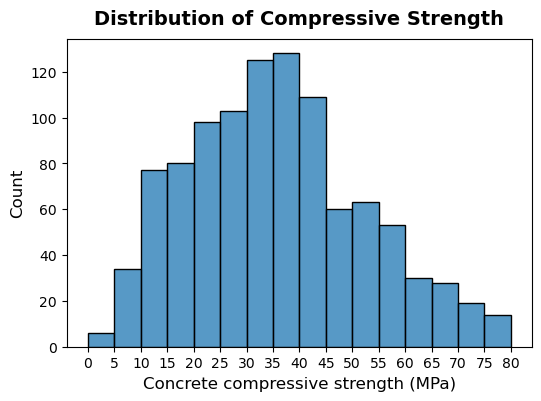

In [ ]:
# The histogram of Concrete Compressive Strength (CS) shows how strength values are distributed.
plt.figure(figsize=(6, 4)) # Creates a figure with a specified size
bins = range(0, 85, 5) # Defines bins starting from 0 MPa to 85 MPa with intervals of 5 MPa
ax = sns.histplot(data=d, x='CS', bins=bins) # Creates a histogram of Concrete Compressive Strength (CS) using Seaborn
ax.set_xticks(bins) # Sets x-axis ticks at every 5 MPa to match the bin intervals
ax.set_xlabel('Concrete compressive strength (MPa)', fontsize=12) # Labels the x-axis with the appropriate unit
ax.set_ylabel('Count', fontsize=12) # Labels the y-axis as 'Count' to indicate frequency
ax.set_title('Distribution of Compressive Strength', fontsize=14, fontweight='bold', y=1.02) # Sets the title of the histogram
plt.show() # Displays the plot

From the dataset, it is evident that most strength values fall between 20 and 50 MPa, with the highest frequencies observed in the 30-40 MPa range. This suggests that most concrete mixtures tested in the dataset achieve moderate compressive strength, while fewer samples exhibit very low (less than 10 MPa) or very high (more than 60 MPa) strengths. The histogram also reveals a slightly right-skewed distribution, indicating that while some mixtures achieve exceptionally high strengths, they are less common. The distribution does not follow a perfectly normal bell curve, suggesting that multiple factors influence strength variations across different mixtures.

## Histogram for all the Features

The histograms reveal important distribution patterns for each feature, providing insights into the usage and variability of different concrete mixture components.

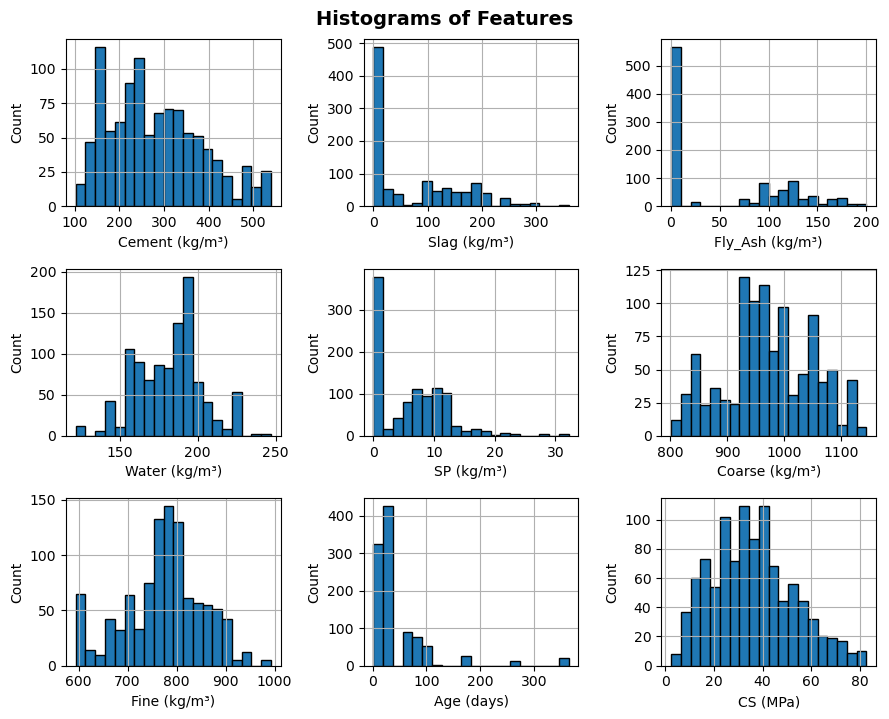

In [ ]:
# Define units for each feature
feature_units = {
    'Cement': ' (kg/m³)',
    'Slag': ' (kg/m³)',
    'Fly_Ash': ' (kg/m³)',
    'Water': ' (kg/m³)',
    'SP': ' (kg/m³)',
    'Coarse': ' (kg/m³)',
    'Fine': ' (kg/m³)',
    'Age': ' (days)',
    'CS': ' (MPa)'  # Compressive Strength
}

# Create histograms for all numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))  # Creates a grid of subplots
axes = axes.flatten()  # Flattens the 2D array of axes for easy iteration

for i, col in enumerate(d.columns):
    d[col].hist(ax=axes[i], bins=20, edgecolor='black')  # Generates histogram for each feature
    axes[i].set_xlabel(f'{col}{feature_units.get(col, "")}', fontsize=10)  # Labels x-axis with units
    axes[i].set_ylabel('Count', fontsize=10)  # Adds y-axis label

plt.tight_layout()  # Adjusts spacing between subplots for better readability
plt.suptitle('Histograms of Features', fontsize=14, fontweight='bold', y=1.02)  # Adds a title for all histograms
plt.show()  # Displays the plot

The distribution of cement exhibits a bimodal pattern, with two distinct peaks around 200-300 kg/m³ and more than 400 kg/m³.  While the first peak is more pronounced, the second peak, though less distinct, still indicates a preference for higher cement content in certain mixtures. In contrast, slag and fly ash show left-skewed distributions, where most values are close to zero, with a long tail extending toward higher quantities. This suggests that slag and fly ash are not frequently used, and when they are, they appear in relatively low amounts across mixtures.

The water content follows a normal, bell-shaped distribution, centered around 180-200 kg/m³, indicating that water usage is fairly consistent across mixtures, with very few extreme values. Similarly, coarse aggregate follows a symmetrical, normally distributed pattern, with a typical range between 900-1050 kg/m³, while fine aggregate also exhibits a bell-shaped curve, peaking around 750-800 kg/m³. This suggests that both types of aggregates are used consistently in concrete mixtures.

The superplasticizer (SP) distribution is left-skewed, with most values near zero but a few mixtures containing significantly higher amounts. The age of concrete samples also follows a left-skewed distribution, with most samples being tested at early curing ages (0-50 days) and fewer tests conducted at longer curing periods.

Finally, the concrete compressive strength (CS) distribution is slightly right-skewed but generally follows a normal pattern. These distribution patterns provide valuable insights into material composition and usage trends, helping to understand the impact of different components on concrete strength.

## Box Plots

The box plot analysis was conducted to detect outliers and examine the distribution of values across the dataset. It highlights key variations in the dataset, helping to identify data trends, uncommon mix designs, and potential areas for further investigation into the factors influencing concrete compressive strength.

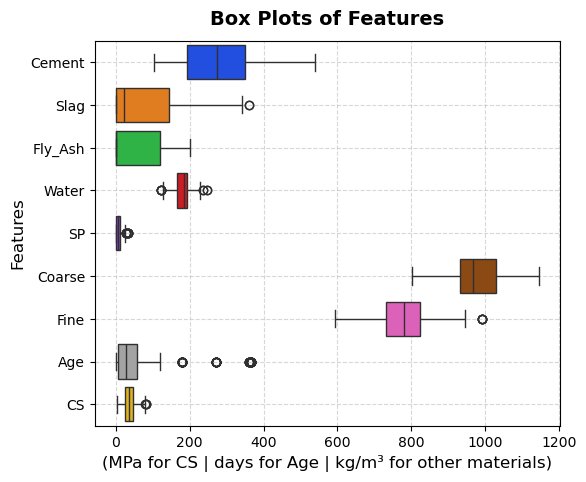

In [ ]:
# Box plot for each feature - used to detect outliers and decide how to handle them
plt.figure(figsize=(6, 5)) # Creates a figure with a specified size
sns.boxplot(data=d, orient='h', palette='bright') # Generates horizontal box plots for all numerical features using a bright color palette

plt.title('Box Plots of Features', fontsize=14, fontweight='bold', y=1.02) # Sets the title of the box plot
plt.xlabel('(MPa for CS | days for Age | kg/m³ for other materials)', fontsize=12)  # Set the x-axis label
plt.ylabel('Features', fontsize=12)  # Set the y-axis label
plt.grid(True, linestyle='--', alpha=0.5)  # Improve readability with subtle grid lines
plt.show() # Displays the plot

The results indicate that cement content follows a normal distribution without significant outliers, while slag and fly ash exhibit low usage with mild outliers, confirming their limited presence in most mixtures. Water content remains fairly consistent, though some higher values (above 240 kg/m³) suggest mixtures with increased water-to-cement ratios. Superplasticizer (SP), in contrast, shows a few high-value outliers (approximately 30 kg/m³), indicating selective use in high-performance concrete. The distributions of coarse and fine aggregates are mostly normal, though a few coarse aggregate values exceed 1100 kg/m³, reflecting uncommon mix designs. The age of concrete samples is highly skewed, with most curing periods concentrated in early ages (0-50 days), while a few long-term samples (approximately 365 days) stand as outliers. Finally, the compressive strength (CS) exhibits a wide range, with some very low (less than 10 MPa) and very high (more than 70 MPa) outliers, suggesting a mix of low-strength and high-performance concrete samples.

## Removing Outliers

To improve data quality and minimize the impact of extreme values, outliers were removed by setting a threshold of three sigma (3σ), all data points exceeding this limit were eliminated.


For further analyses after the exploratory data analysis, two modeling approaches were considered to analyze the impact of outliers on the predictive performance. Model 1 was trained on the original dataset containing outliers, as these points may have high leverage and provide valuable insights. Model 2, on the other hand, was trained on the cleaned dataset without outliers, allowing for more stable model performance and easier interpretation. This approach ensures a comprehensive evaluation, balancing the potential benefits of retaining high-leverage points with the advantages of working with a more normally distributed dataset.

In [ ]:
from scipy.stats import zscore # Imports the zscore function from SciPy to detect outliers

# Compute Z-scores for each feature in the dataset
z_scores = d.apply(zscore)

# Define the threshold for identifying outliers
threshold = 3 # Any value greater than 3 standard deviations from the mean is considered an outlier
d_no_outliers = d[(z_scores < threshold).all(axis=1)] # Retains only rows where all feature values are within the threshold

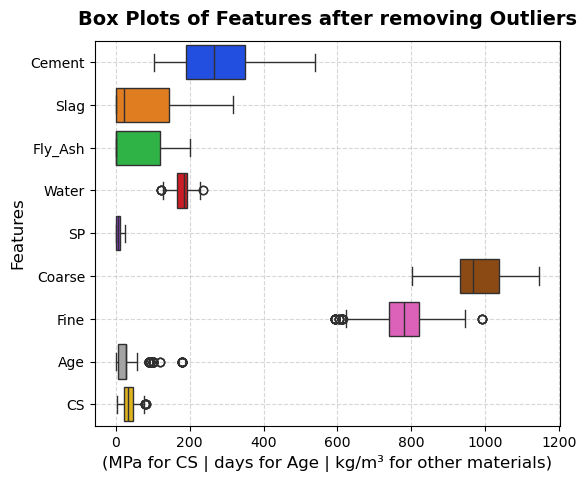

In [ ]:
# Create a box plot for each feature after removing outliers
plt.figure(figsize=(6, 5)) # Creates a figure with a specified size
sns.boxplot(data=d_no_outliers, orient='h', palette='bright') # Generates horizontal box plots for all numerical features using a bright color palette

plt.title('Box Plots of Features after removing Outliers', fontsize=14, fontweight='bold', y=1.02) # Sets the title of the box plot
plt.xlabel('(MPa for CS | days for Age | kg/m³ for other materials)', fontsize=12)  # Set the x-axis label
plt.ylabel('Features', fontsize=12)  # Set the y-axis label
plt.grid(True, linestyle='--', alpha=0.5)  # Improve readability with subtle grid lines
plt.show() # Displays the plot

After removing outliers, the new box plots show fewer extreme points, particularly in features such as Superplasticizer (SP), Age, and Water, which previously contained high number of outliers. The distributions of these features are now more compact, minimizing the influence of uncommon, extreme values.
Furthermore, the removal of outliers has led to a more normally distributed dataset, especially in variables like Age, Fly Ash, and Slag, which were previously skewed. This suggests that the presence of outliers was distorting the original distribution, and their removal has resulted in a dataset that better represents real-world trends. By eliminating these anomalies, the dataset becomes more suitable for machine learning applications, allowing models to be trained on data that is less prone to overfitting.

## Correlation Matrix

The correlation matrix was analyzed to understand the relationships between different features and their impact on concrete compressive strength (CS).

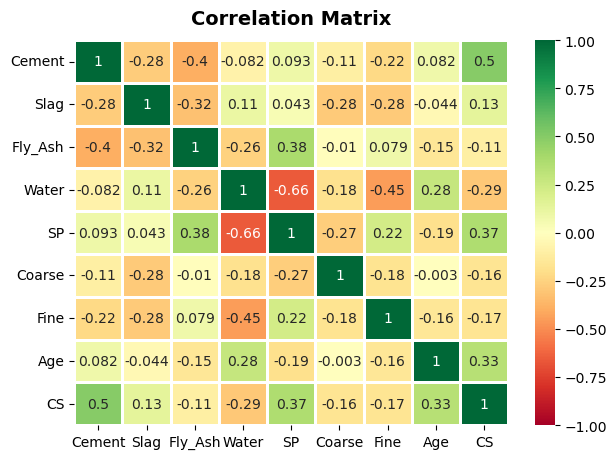

In [ ]:
# Feature Correlation Heatmap: Help to identify the relationships and correlations between all numerical features.
plt.figure(figsize=(7, 5)) # Creates a figure with a specified size
#Plots a heatmap with colors representing the correlation strength: green (+1.0) for positive correlation, red (-1.0) for negative correlation and yellow (0.0) for no correlation.
sns.heatmap(d.corr(), cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, annot=True, linewidths=1);
plt.title('Correlation Matrix', fontsize=14, fontweight='bold', y=1.02) # Sets the title of the correlation matrix
plt.show() # Displays the plot

The analysis indicates that cement (0.50) exhibits the strongest positive correlation with compressive strength (CS). Similarly, age (0.33) positively influences CS, as concrete continues to gain strength over time. Additionally, superplasticizer (SP) (0.37) plays a role in improving workability, which in turn contributes to increased compressive strength.

In contrast, water (-0.29) negatively affects CS, as a higher water-cement ratio weakens the mixture. Fine (-0.17) and coarse (-0.16) aggregates show weak negative correlations, suggesting that excessive aggregate content may reduce cement bonding. Fly ash (-0.11) and slag (0.13) exhibit minimal correlation with CS, indicating that they do not significantly impact strength alone.

Other notable correlations include the strong negative relationship between water and SP (-0.66), indicating that higher SP content allows for lower water usage while maintaining workability. Additionally, fly ash (0.38) has a moderate positive correlation with SP, suggesting that fly ash and SP are often used together to enhance concrete performance.

These findings emphasize the critical influence of cement content, curing time, and superplasticizer (SP) in enhancing concrete compressive strength, while also underscoring the negative impact of excessive water and aggregate content, which may weaken the mix and reduce overall strength.

## KDE (Kernel Density Estimation) plots

These plots were used to visualize the density distribution of compressive strength (CS) relative to each feature, helping to identify density trends, nonlinear relationships, and feature influence on CS.

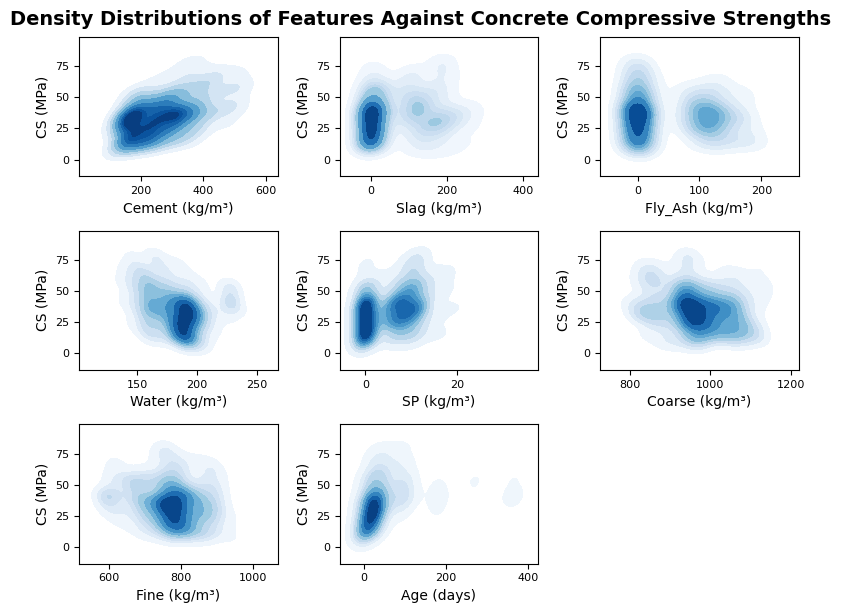

In [ ]:
plt.figure(figsize=(8, 6))  # Creates a figure with a specified size

# Exclude 'CS' from the feature list to avoid plotting CS vs CS
features_without_CS = [col for col in d.columns if col != 'CS']  # Creates a list of all features except 'CS'

# Generate KDE plots for selected features
for i, col in enumerate(features_without_CS, 1):  # Iterates through each feature (excluding 'CS')
    plt.subplot(3, 3, i)  # Creates a 3 x 3 grid layout for plotting multiple KDE graphs
    sns.kdeplot(data=d, x=col, y='CS', fill=True, cmap="Blues")  # Plots KDE for each feature against CS using blue color density shading

    plt.xlabel(f"{col}{feature_units.get(col, '')}")  # Adds unit to the x-axis label
    plt.ylabel(f"CS{feature_units['CS']}")  # Adds unit to the y-axis label
    plt.tight_layout()  # Adjusts the layout to prevent overlapping of subplots
    plt.xticks(fontsize=8, rotation=0)  # Adjust x-axis ticks and prevent rotation
    plt.yticks(fontsize=8)  # Adjust y-axis ticks

plt.suptitle('Density Distributions of Features Against Concrete Compressive Strengths', fontsize=14, fontweight='bold', y=1.02)  # Adds a title
plt.show()  # Displays the KDE plots

These plots reveal how CS is distributed across different feature values, detect hidden patterns that may not be evident in scatter plots, and distinguish between strong, moderate, and weak predictors, providing valuable insights into the factors affecting concrete strength.

The results exhibits that cement is the strongest predictor, showing a direct positive correlation with CS, reinforcing its role as the primary binding agent in concrete. Curing age also exhibits a positive relationship, with strength increasing significantly within the first 50 days, highlighting the importance of proper curing. Superplasticizer (SP) also enhances CS by improving workability and reducing water demand, though its influence is less significant than cement.

Water content, on the other hand, displays a negative correlation, as excess water weakens the water-cement ratio, reducing strength. Slag shows a moderate but unclear effect, while fly ash, coarse aggregate, and fine aggregate exhibit minimal direct impact on CS, serving primarily as structural components rather than strength enhancers.

These findings emphasize the critical role of cement and curing age in optimizing compressive strength, while excessive water content should be carefully managed to prevent strength reduction.

## Scatterplot with regression trend lines

The scatterplot with regression trend lines was utilized to analyze the relationship between cement, age, superplasticizer (SP) and water content with concrete compressive strength (CS). These variables were previously identified as the most significant predictors of CS.

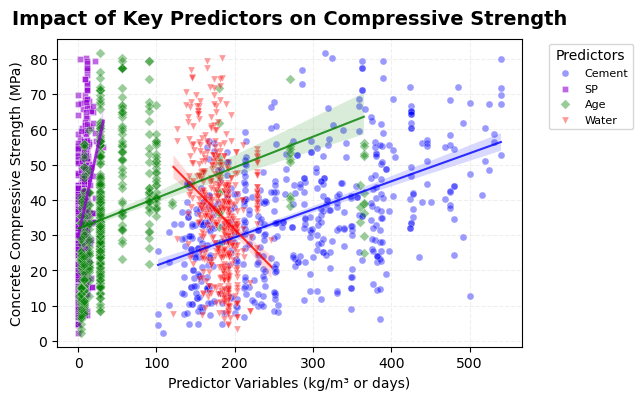

In [ ]:
plt.figure(figsize=(6, 4)) # Creates a figure with a specified size

# Define colors, line styles, and markers for each predictor
colors = {'Cement': 'blue', 'SP': 'darkviolet', 'Age': 'green', 'Water': 'red'}
line_styles = {'Cement': '-', 'SP': '-', 'Age': '-', 'Water': '-'}
markers = {'Cement': 'o', 'SP': 's', 'Age': 'D', 'Water': 'v'}

# Scatter plot with increased marker size for SP and Age
for feature, color in colors.items(): # Iterating through each predictor variable
    alpha_value = 0.6 if feature == "SP" else 0.4  # Increasing opacity for SP to make it more visible
    sns.scatterplot(data=d.sample(frac=0.5), x=feature, y='CS', color=color, alpha=alpha_value, s=25, label=feature, marker=markers[feature]) # Randomly selecting 50% of data points to reduce clutter

# Overlay regression trend lines with adjusted thickness for SP
for feature, color in colors.items():  # Iterating through each predictor again for regression lines
    linewidth_value = 2 if feature == "SP" else 1.5  # Make SP line slightly thicker for better visibility
    sns.regplot(data=d, x=feature, y='CS', scatter=False, color=color,
                line_kws={"linestyle": line_styles[feature], "linewidth": linewidth_value, "alpha": 0.8}) # Keeping lines readable

# Improve labels and title for better readability
plt.xlabel('Predictor Variables (kg/m³ or days)', fontsize=10) # Sets the x-axis label
plt.ylabel('Concrete Compressive Strength (MPa)', fontsize=10) # Sets the y-axis label
plt.title('Impact of Key Predictors on Compressive Strength', fontsize=14, fontweight='bold', y=1.02) # Adds a title

# Move legend outside the plot to avoid clutter
plt.legend(title="Predictors", loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=8, frameon=True)
plt.grid(True, linestyle='--', alpha=0.2) # Adds a subtle dashed grid for better readability
plt.show() # Displays the final plot

The scatter plots illustrate about 50 % of the data points (for better visualization), while the regression trend lines provide a clear representation of overall trends.

Also the results confirms that cement exhibits a strong positive correlation with CS, reinforcing its critical role in strength development. Similarly, age and SP demonstrates a positive relationship. Conversely, water content has a negative correlation with CS, as higher water-to-cement ratios weaken the concrete matrix, reducing its durability.

The regression trend lines validate these findings, with cement, SP, and age exhibiting an upward trajectory, confirming their beneficial impact on CS, while water follows a downward slope, reinforcing its adverse effect. The shaded regions around these trend lines indicate confidence intervals, providing insight into the range of possible variations. This visualization underscores the importance of cement content, SP content and curing time in enhancing compressive strength, while highlighting the negative impact of excessive water content, emphasizing the need for careful mix design to achieve optimal concrete performance.

## Model 1: Considering the dataset has Outliers

In [ ]:
# Import necessary libraries from sklearn
from sklearn.model_selection import KFold, cross_val_score
# KFold: Implements k-fold cross-validation, splitting data into k subsets for training and validation
# cross_val_score: Computes cross-validation scores to evaluate model performance
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For standardizing the dataset
from sklearn.pipeline import make_pipeline # To create a pipeline for data preprocessing and model training
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.preprocessing import PolynomialFeatures # For polynomial regression (Quadratic)
from sklearn.linear_model import Ridge, Lasso #Ridge and Lasso regression models
from sklearn.metrics import mean_squared_error,make_scorer # For calculating Mean Squared Error (MSE)


**Defining Independent (X) and Dependent (y) Variables**

In the process of building predictive models, it is essential to properly define the features and target variable. The dataset is split into independent variables, denoted as X, and the dependent variable, denoted as y. In this case, X consists of all columns except 'CS', while y represents the 'CS' column, which is the target variable to be predicted.


In [ ]:
# Split into features (X) and target (y)
X = d_no_outliers.drop(columns=['CS']) # Select all columns except 'CS' as features
y = d_no_outliers['CS']  # Select 'CS' as the target variable

#use no outlier data which is d_no_outliers

**Splitting Data for Holdout Cross-Validation**

Properly splitting the dataset is another essential step in model training and evaluation. The train_test_split function ensures that the dataset is divided into training and testing sets, allowing models to learn patterns from one portion of the data while being evaluated on an unseen portion,thus providing an unbiased estimate of model performance.The use of random_state=0 ensures consistent results across multiple runs of the experiment. Additionally, enabling shuffle=True ensures that the dataset is randomly shuffled before splitting, preventing any biases that may arise from the original ordering of the data.


In [ ]:
#Holdout validation
# test_size=0.4: 40% of the data is allocated for testing
# random_state=0: Ensures reproducibility of results
# shuffle=True: Ensures the dataset is randomly shuffled before splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True)


**Defining a Function to retrieve the desired model**

Selecting an appropriate regression model is crucial for achieving accurate predictions and ensuring model interpretability. The function get_model is designed to return a regression model based on the specified model_type, incorporating preprocessing steps such as feature scaling and polynomial transformation where necessary. Feature scaling, implemented using StandardScaler, is essential as it ensures that all features are on the same scale, which is particularly important for models sensitive to feature magnitudes.

For simple linear relationships, the function returns a pipeline consisting of StandardScaler and LinearRegression. Linear regression assumes a linear relationship between independent and dependent variables, making it a fundamental model in predictive analytics. When dealing with quadratic relationships, the function returns a pipeline that includes **PolynomialFeatures with a degree of 2**, which augments the dataset with squared terms of the features.

To enhance model robustness and prevent overfitting, the function also provides access to regularized regression techniques. Ridge regression, implemented with **Ridge(alpha=1)**, applies L2 regularization, which penalizes large coefficients, thereby reducing model complexity without completely eliminating any predictor. This method is particularly useful when dealing with multicollinearity among features. In contrast, Lasso regression, implemented with **Lasso(alpha=1)**, applies L1 regularization, which has the unique ability to shrink some coefficients to exactly zero. This property makes Lasso an effective tool for feature selection, as it can identify and retain only the most relevant predictors.

By integrating these models into a streamlined pipeline, the function get_model facilitates efficient model selection and training. The choice of model type depends on the underlying data characteristics, and the appropriate selection ensures that the regression model is well-suited to capture the true relationships within the dataset while reducing overfitting risks.

In [ ]:
# Function to return the appropriate regression model based on model_type
def get_model(model_type):
    if model_type == 'linear':
        return make_pipeline(StandardScaler(), LinearRegression())
        # StandardScaler ensures features are on the same scale (zero mean, unit variance)
        # LinearRegression() fits a simple linear regression model

    elif model_type == 'quadratic':
        return make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
        # PolynomialFeatures(degree=2) adds quadratic terms (x^2) for polynomial regression
        # LinearRegression() fits the polynomial regression model

    elif model_type == 'ridge':
        return make_pipeline(StandardScaler(), Ridge(alpha = 1))
        # Ridge Regression applies L2 regularization, which can shrink some feature coefficients near to zero (Not to zero)

    elif model_type == 'lasso':
        return make_pipeline(StandardScaler(), Lasso(alpha = 1))
        # Lasso Regression applies L1 regularization, which can shrink some feature coefficients to zero

**Forward Feature Selection**

Forward Stepwise Selection is a feature selection technique that iteratively selects the most significant predictor variables to improve the performance of a regression model.

To begin the selection process, a list of all available features is defined, and an empty list is initialized to store the selected features for each model. The technique is applied to different regression models, including linear, quadratic, lasso, and ridge regression. The process iterates through the dataset, evaluating each remaining feature individually to determine its impact on model performance. At each step, a feature is tentatively added to the existing selected features, and a regression model is trained using this subset of features. The model's performance is then assessed by computing the MSE on a validation dataset.

During each iteration, the feature that results in the lowest MSE is identified as the best-performing feature and is added to the selected features list. This ensures that only features contributing to improved model accuracy are retained. The selected feature is subsequently removed from the pool of remaining features, and the process continues until no further improvement in MSE is observed. This iterative selection ensures that the final model includes only the most relevant predictors, reducing the risk of unnecessary complexity and enhancing the model’s generalizability.


In [ ]:
# FORWARD STEPWISE SELECTION

# Define the list of all features available in the dataset
all_features = list(X_train.columns)

# Initialize empty lists and dictionary to store selected features for each model
selected_features = []
selected_features_dict ={}

# Loop through each regression model type to perform forward stepwise selection
for model_type in ["linear", "quadratic", "lasso", "ridge"]:
    print("-----------------------------------------------------------------------------------------------------")
    print(f"\nPerforming forward selection for {model_type} regression model...")

    # Initialize variables to keep track of the best Mean Squared Error (MSE)
    best_mse = float('Inf')  # Initialize best MSE as infinity (higher than any possible value)
    selected_features = []  # Reset the selected features for each model
    remaining_features = all_features.copy() # Create a copy of all available features

    # Forward Stepwise Selection: Iteratively add the best feature that minimizes the MSE
    while len(remaining_features) > 0:

        best_feature = None # Variable to store the feature that improves model performance the most

        # Iterate over each remaining feature to find the best one to add
        for feature in remaining_features:
            current_features = selected_features + [feature] # Create a new feature subset by adding one feature
            model = get_model(model_type) # Retrieve the appropriate model pipeline

            #let's train our models with the current feature subset
            model.fit(X_train[current_features], y_train)

            # Predict on the test set using the selected features
            y_pred = model.predict(X_test[current_features])

            # Calculate the Mean Squared Error (MSE) for model performance evaluation
            mse = mean_squared_error(y_test, y_pred)

            # If the new feature improves the model (lower MSE), update best_mse and best_feature
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

        # If a feature was found that improves MSE, add it to the selected features
        if best_feature:
            selected_features.append(best_feature) # Add the best feature to the selected list
            remaining_features.remove(best_feature)  # Remove the selected feature from the remaining pool
        else:
            break # Stop if no further improvement is possible

    # Store the selected features for this model type in the dictionary
    selected_features_dict[model_type] = selected_features

    # Train the final model using only the selected features
    final_model = get_model(model_type) # Retrieve the appropriate model
    final_model.fit(X_train[selected_features], y_train)  # Train the final model using the optimal feature subset

    # Make predictions using the selected features
    y_pred = final_model.predict(X_test[selected_features])

    # Compute the final Mean Squared Error (MSE) on the test dataset
    mse_test = mean_squared_error(y_test, y_pred)

    # Print the selected features and the final model performance
    print(f"Selected features for {model_type} regression model : {selected_features}")
    print(f"Final MSE for {model_type} regression: {mse_test:.3f}")
    print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")


-----------------------------------------------------------------------------------------------------

Performing forward selection for linear regression model...
Selected features for linear regression model : ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fly_Ash', 'Fine', 'Coarse']
Final MSE for linear regression: 95.026
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Performing forward selection for quadratic regression model...
Selected features for quadratic regression model : ['Age', 'Cement', 'Slag', 'SP', 'Water', 'Fly_Ash', 'Fine', 'Coarse']
Final MSE for quadratic regression: 50.926
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Performing forward selection for lasso reg

**Model Evaluation and Hyperparameter tuning**

Once the optimal subset of features has been determined, the selected features are stored in a dictionary corresponding to the model type. The final model is then trained using only the selected features, ensuring that irrelevant or redundant variables do not contribute noise to the learning process. By using the function get_model, the appropriate regression model is retrieved, and training is conducted exclusively on the chosen subset of features.

Following training, the model makes predictions using the selected features, and performance is evaluated through the computation of the Mean Squared Error (MSE) on the test dataset. This metric quantifies the average squared difference between predicted and actual values, providing an indication of how well the model generalizes to new data.

Hyperparameter tuning is a crucial step in machine learning model optimization, and nested cross-validation provides a robust approach for selecting optimal parameters while ensuring model generalization.

The methodology involves iterating over selected models and their corresponding features. For Ridge regression, the selected features are used to partition the dataset into training and testing sets, with 40% of the data reserved for testing. Within the training data, an inner K-Fold cross-validation with five splits is performed to tune the hyperparameter alpha by searching over a predefined range of values using logarithmic spacing. Ridge regression, which applies L2 regularization, is optimized using GridSearchCV, which selects the best estimator based on negative mean squared error. The optimal Ridge model is then evaluated on the outer test set, and the mean squared error is computed to assess its performance.

Similarly, for Lasso regression, the dataset is split into training and testing sets, with 60% of the data allocated for training. An inner cross-validation loop is applied to fine-tune the L1 regularization parameter alpha over a range of values. GridSearchCV is utilized to determine the best-performing Lasso model by minimizing the mean squared error. The optimal model is then validated on the outer test set, and its predictive accuracy is evaluated using the mean squared error metric.


In [ ]:
# USING ONLY FEATURE SELECTED DATA
# Feature Selection: Ridge vs Lasso using Nested K-fold

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

print("\nFinding the best alpha value for Lasso and Ridge using GridSearchCV inside the Nested KFold.....")
r2_score_dict ={}
for model,features in selected_features_dict.items():
    if model == "ridge":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"Selected features for {model} Regression: {features}")
        # Outer Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)

        #Create a Kfold in inner loop with 60 % train data from Holdout(Outer Loop) for hyperparameter tuning
        inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

        # Define hyperparameter ranges for Ridge and Lasso
        ridge_params = {'alpha': np.logspace(-3, 5, 50)}

        # Initialize Ridge and Lasso models
        ridge = Ridge()

        # To store results
        ridge_mse_list = []

        #Using GridSearchCV
        ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=inner_cv)

        #Training the model
        ridge_grid.fit(X_train, y_train)
        best_ridge = ridge_grid.best_estimator_

        # Evaluate Ridge on the outer test set
        ridge_pred = best_ridge.predict(X_test)
        ridge_mse = (mean_squared_error(y_test, ridge_pred))
        print(f"Best Ridge Alpha: {best_ridge.alpha:.4f}")
        print(f"Ridge Regression MSE (Using KFold): {ridge_mse:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "lasso":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"Selected features for {model} Regression: {features}")
        lasso_params = {'alpha': np.logspace(-3, 3, 50)}
        lasso = Lasso()
        lasso_mse_list = []

        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

        # Inner CV: Hyperparameter tuning for Lasso
        lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=inner_cv)
        lasso_grid.fit(X_train, y_train)
        best_lasso = lasso_grid.best_estimator_

        # Evaluate Lasso on the outer test set
        lasso_pred = best_lasso.predict(X_test)
        lasso_mse = (mean_squared_error(y_test, lasso_pred))
        print(f"Best Lasso Alpha: {best_lasso.alpha:.4f}")
        print(f"Lasso Regression MSE (Using KFold): {lasso_mse:.4f}")
        print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")



Finding the best alpha value for Lasso and Ridge using GridSearchCV inside the Nested KFold.....
-----------------------------------------------------------------------------------------------------
Selected features for lasso Regression: ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fine']
Best Lasso Alpha: 0.0126
Lasso Regression MSE (Using KFold): 102.8947
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
Selected features for ridge Regression: ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fly_Ash', 'Coarse', 'Fine']
Best Ridge Alpha: 3393.2218
Ridge Regression MSE (Using KFold): 95.7751
-----------------------------------------------------------------------------------------------------
-----------------------------------------------END---------------------------------------------------


**Retraining the data**

The process begins with Linear Regression, where the selected features for this model are extracted, and a train-test split is performed with a 40% holdout for testing. Standard scaling is applied to normalize the features, and a Linear Regression model is fitted to the training data. Predictions are then made on the test set, and the Mean Squared Error (MSE) is calculated to assess model performance. Additionally, the R² score, which quantifies the proportion of variance explained by the model, is computed.

Next, Quadratic Regression is implemented by extending the Linear Regression model to include polynomial features of degree two. This transformation captures non-linear relationships within the data. After performing the same train-test split, the model is trained and evaluated similarly. The computed MSE and R² scores help determine whether the quadratic transformation improves predictive accuracy.

For Lasso Regression, a regularization technique is introduced to prevent overfitting by penalizing the absolute magnitude of coefficients. The best alpha value, previously determined through hyperparameter tuning, is used to initialize the Lasso model. The model is trained on the selected features, and predictions are made on the test set. The MSE and R² scores indicate the model's ability to generalize while enforcing sparsity in feature selection, ensuring only the most significant predictors are retained.

Similarly, Ridge Regression is employed with the best alpha value found during prior tuning. Unlike Lasso, Ridge penalizes the squared magnitude of coefficients, reducing the impact of multicollinearity among features while maintaining all predictors in the model. After training and making predictions, the MSE and R² scores are computed to evaluate its effectiveness.

In [ ]:
print("\n\n\nRetraining the model with selected features and using best alpha value for Lasso and Ridge.....")
for model,features in selected_features_dict.items():
    if model == "linear":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        # Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        linear_model = make_pipeline( StandardScaler(),LinearRegression())
        linear_model.fit(X_train, y_train)
        linear_pred = linear_model.predict(X_test)
        linear_mse = (mean_squared_error(y_test, linear_pred))
        print(f"Linear Regression MSE (Holdout): {linear_mse:.4f}")
        r2_score_dict[model]= r2_score(y_test, linear_pred)
        print(f"Linear, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "quadratic":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        # Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        quadratic_model = make_pipeline( StandardScaler(),PolynomialFeatures(degree=2), LinearRegression())
        quadratic_model.fit(X_train, y_train)
        quadratic_pred = quadratic_model.predict(X_test)
        quadratic_mse = (mean_squared_error(y_test, quadratic_pred))
        print(f"Quadratic Regression MSE (Holdout): {quadratic_mse:.4f}")
        r2_score_dict[model]= r2_score(y_test, quadratic_pred)
        print(f"Quadratic, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "lasso":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        # Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        lasso =Lasso(alpha=best_lasso.alpha)
        lasso.fit(X_train, y_train)
        lasso_pred = best_lasso.predict(X_test)
        lasso_mse = (mean_squared_error(y_test, lasso_pred))
        print(f"Lasso Regression MSE (Holdout): {lasso_mse:.4f} and Best Lasso Alpha: {best_lasso.alpha:.4f}")
        r2_score_dict[model]= r2_score(y_test, lasso_pred)
        print(f"Lasso, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")


    elif model == "ridge":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        # Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        ridge = Ridge(alpha=best_ridge.alpha)
        ridge.fit(X_train, y_train)
        ridge_pred = best_ridge.predict(X_test)
        ridge_mse = (mean_squared_error(y_test, ridge_pred))
        print(f"Ridge Regression MSE (Holdout): {ridge_mse:.4f} and Best Ridge Alpha: {best_ridge.alpha:.4f}")
        r2_score_dict[model]= (r2_score(y_test, ridge_pred))
        print(f"Ridge, R² score: {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")




Retraining the model with selected features and using best alpha value for Lasso and Ridge.....
-----------------------------------------------------------------------------------------------------

Selected features for linear Regression: ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fly_Ash', 'Fine', 'Coarse']
Linear Regression MSE (Holdout): 95.0261
Linear R² score:  0.6531
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Selected features for quadratic Regression: ['Age', 'Cement', 'Slag', 'SP', 'Water', 'Fly_Ash', 'Fine', 'Coarse']
Quadratic Regression MSE (Holdout): 50.9260
Quadratic R² score:  0.8141
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Selected features for las

In [ ]:
temp = r2_score_dict["linear"]
for keys in r2_score_dict:
    if r2_score_dict[keys] > temp:
        print(f"Best R² value is {r2_score_dict[keys]:.3f} and the winning model is {keys} without outliers")
        break

Best R² value is 0.814 and the winning model is quadratic wihtout outliers


The Best R² value is **0.814** and the winning model is Quadratic (Polynomial with degree 2), trained with outliers free dataset

## Model 2: Considering the dataset has high leverage points

This model will consider the dataset has high leverage points and not as outliers, so the entire dataset is used. Holdout validation is used to split the data into 60% for training and 40% for testing.


In [ ]:
# Split into features (X) and target (y)
X = d.drop(columns=['CS']) # Select all columns except 'CS' as features (independent variables)
y = d['CS']  # Select 'CS' as the target variable (dependent variable)

In [ ]:
#Holdout validation
# test_size=0.4: 40% of the data is allocated for testing
# random_state=0: Ensures reproducibility of results
# shuffle=True: Ensures the dataset is randomly shuffled before splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True)


The function provides a flexible approach for selecting regression models and incorporating standardization for consistency. It includes Linear and Quadratic regression for simple and non-linear patterns, while Ridge (L2) and Lasso (L1) regularization help prevent overfitting and enable feature selection. By integrating these models into a streamlined pipeline, the function ensures efficient model selection and optimizes performance based on the dataset characteristics.




In [ ]:
# Function to return the appropriate regression model based on model_type
def get_model(model_type):
    if model_type == 'linear':
        return make_pipeline(StandardScaler(), LinearRegression())
        # StandardScaler ensures features are on the same scale (zero mean, unit variance)
        # LinearRegression() fits a simple linear regression model

    elif model_type == 'quadratic':
        return make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
        # PolynomialFeatures(degree=2) adds quadratic terms (x^2) for polynomial regression
        # LinearRegression() fits the polynomial regression model

    elif model_type == 'ridge':
        return make_pipeline(StandardScaler(), Ridge(alpha = 1))
        # Ridge Regression applies L2 regularization, which can shrink some feature coefficients near to zero (Not to zero)

    elif model_type == 'lasso':
        return make_pipeline(StandardScaler(), Lasso(alpha = 1))
        # Lasso Regression applies L1 regularization, which can shrink some feature coefficients to zero

Forward feature selection was used to iteratively identify the optimal feature set by minimizing the Mean Squared Error (MSE), starting from an empty set and adding features that contribute the least MSE. This process, applied to Linear, Quadratic, Ridge, and Lasso models, ensures that only the most relevant features are included, improving model efficiency and interpretability.

In [ ]:
# FORWARD STEPWISE SELECTION

# Define the list of all features available in the dataset
all_features = list(X_train.columns)

# Initialize empty lists and dictionary to store selected features for each model
selected_features = []
selected_features_dict ={}

# Loop through each regression model type to perform forward stepwise selection
for model_type in ["linear", "quadratic", "lasso", "ridge"]:
    print("-----------------------------------------------------------------------------------------------------")
    print(f"\nPerforming forward selection for {model_type} regression model...")

    # Initialize variables to keep track of the best Mean Squared Error (MSE)
    best_mse = float('Inf')  # Initialize best MSE as infinity (higher than any possible value)
    selected_features = []  # Reset the selected features for each model
    remaining_features = all_features.copy() # Create a copy of all available features

    # Forward Stepwise Selection: Iteratively add the best feature that minimizes the MSE
    while len(remaining_features) > 0:

        best_feature = None # Variable to store the feature that improves model performance the most

        # Iterate over each remaining feature to find the best one to add
        for feature in remaining_features:
            current_features = selected_features + [feature] # Create a new feature subset by adding one feature
            model = get_model(model_type) # Retrieve the appropriate model pipeline

            #Train the models with the current feature subset
            model.fit(X_train[current_features], y_train)

            # Predict on the test set using the selected features
            y_pred = model.predict(X_test[current_features])

            # Calculate the Mean Squared Error (MSE) for model performance evaluation
            mse = mean_squared_error(y_test, y_pred)

            # If the new feature improves the model (lower MSE), update best_mse and best_feature
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

        # If a feature was found that improves MSE, add it to the selected features
        if best_feature:
            selected_features.append(best_feature) # Add the best feature to the selected list
            remaining_features.remove(best_feature)  # Remove the selected feature from the remaining pool
        else:
            break # Stop if no further improvement is possible

    # Store the selected features for this model type in the dictionary
    selected_features_dict[model_type] = selected_features

    # Train the final model using only the selected features
    final_model = get_model(model_type) # Retrieve the appropriate model
    final_model.fit(X_train[selected_features], y_train)  # Train the final model using the optimal feature subset

    # Make predictions using the selected features
    y_pred = final_model.predict(X_test[selected_features])

    # Compute the final Mean Squared Error (MSE) on the test dataset
    mse_test = mean_squared_error(y_test, y_pred)

    # Print the selected features and the final model performance
    print(f"Selected features for {model_type} regression model : {selected_features}")
    print(f"Final MSE for {model_type} regression: {mse_test:.3f}")
    print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")


-----------------------------------------------------------------------------------------------------

Performing forward selection for linear regression model...
Selected features for linear regression model : ['Cement', 'SP', 'Age', 'Slag', 'Water', 'Fly_Ash']
Final MSE for linear regression: 96.957
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Performing forward selection for quadratic regression model...
Selected features for quadratic regression model : ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fly_Ash', 'Coarse', 'Fine']
Final MSE for quadratic regression: 61.301
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Performing forward selection for lasso regression model...
S

The model has been evaluated through a nested K-Fold cross-validation process,  to find the best hyper parameter value of Ridge regression and Lasso regression models. The model takes the data with only the selected features from previous step.
In the case of Ridge regression, a range of alpha values are tried, and the model that produced the minimum MSE was selected. Lasso regression also follows this same procedure but features selection involved Lasso's L1 regularization.

---



In [ ]:
# USING ONLY FEATURE SELECTED DATA
# Feature Selection: Ridge vs Lasso using Nested K-fold

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

print("\nFinding the best alpha value for Lasso and Ridge using GridSearchCV inside the Nested KFold.....")
r2_score_dict ={}
for model,features in selected_features_dict.items():
    if model == "ridge":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"Selected features for {model} Regression: {features}")
        # Outer Holdout for validation
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=42, shuffle=True)

        #Create a Kfold in inner loop with 60 % train data from Holdout(Outer Loop) for hyperparameter tuning
        inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

        # Inner CV: Hyperparameter tuning for Ridge
        ridge_params = {'alpha': np.logspace(-3, 5, 50)} # Define hyperparameter ranges for Ridge
        ridge = Ridge() # Initialize Ridge model
        ridge_mse_list = []

        #Using GridSearchCV the best alpha value is determined
        ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=inner_cv)

        #Training the model
        ridge_grid.fit(X_train, y_train)
        best_ridge = ridge_grid.best_estimator_

        # Evaluate Ridge on the outer test set
        ridge_pred = best_ridge.predict(X_test)
        ridge_mse = (mean_squared_error(y_test, ridge_pred))
        print(f"Best Ridge Alpha: {best_ridge.alpha:.4f}")
        print(f"Ridge Regression MSE (Using KFold): {ridge_mse:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "lasso":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"Selected features for {model} Regression: {features}")

        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

        # Inner CV: Hyperparameter tuning for Lasso
        lasso_params = {'alpha': np.logspace(-3, 3, 50)}# Define hyperparameter ranges for Lasso
        lasso = Lasso() # Initialize Lasso model
        lasso_mse_list = []

        #Using GridSearchCV the best alpha value is determined
        lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=inner_cv)

        lasso_grid.fit(X_train, y_train)
        best_lasso = lasso_grid.best_estimator_

        # Evaluate Lasso on the outer test set
        lasso_pred = best_lasso.predict(X_test)
        lasso_mse = (mean_squared_error(y_test, lasso_pred))
        print(f"Best Lasso Alpha: {best_lasso.alpha:.4f}")
        print(f"Lasso Regression MSE (Using KFold): {lasso_mse:.4f}")
        print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")



Finding the best alpha value for Lasso and Ridge using GridSearchCV inside the Nested KFold.....
-----------------------------------------------------------------------------------------------------
Selected features for lasso Regression: ['Cement', 'SP', 'Age', 'Slag', 'Water', 'Fly_Ash']
Best Lasso Alpha: 0.0010
Lasso Regression MSE (Using KFold): 96.9572
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
Selected features for ridge Regression: ['Cement', 'SP', 'Age', 'Slag', 'Water', 'Fly_Ash']
Best Ridge Alpha: 0.0010
Ridge Regression MSE (Using KFold): 116.5856
-----------------------------------------------------------------------------------------------------
-----------------------------------------------END---------------------------------------------------


This step evaluates the performance of Linear, Quadratic, Lasso, and Ridge regression models after feature selection and hyperparameter tuning. Using hold-out validation, MSE and R² scores assess predictive accuracy, with optimal alpha values from GridSearchCV ensuring effective regularization.

In [ ]:
print("\n\n\nRetraining the model with selected features and using best alpha value for Lasso and Ridge.....")
for model,features in selected_features_dict.items():
    if model == "linear":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        linear_model = make_pipeline( StandardScaler(),LinearRegression())
        linear_model.fit(X_train, y_train)
        linear_pred = linear_model.predict(X_test)
        linear_mse = (mean_squared_error(y_test, linear_pred))
        print(f"Linear Regression MSE (Holdout): {linear_mse:.4f}")
        r2_score_dict[model]= r2_score(y_test, linear_pred)
        print(f"Linear, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "quadratic":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        quadratic_model = make_pipeline( StandardScaler(),PolynomialFeatures(degree=2), LinearRegression())
        quadratic_model.fit(X_train, y_train)
        quadratic_pred = quadratic_model.predict(X_test)
        quadratic_mse = (mean_squared_error(y_test, quadratic_pred))
        print(f"Quadratic Regression MSE (Holdout): {quadratic_mse:.4f}")
        r2_score_dict[model]= r2_score(y_test, quadratic_pred)
        print(f"Quadratic, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")

    elif model == "lasso":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        lasso =Lasso(alpha=best_lasso.alpha)
        lasso.fit(X_train, y_train)
        lasso_pred = best_lasso.predict(X_test)
        lasso_mse = (mean_squared_error(y_test, lasso_pred))
        print(f"Lasso Regression MSE (Holdout): {lasso_mse:.4f} and Best Lasso Alpha: {best_lasso.alpha:.4f}")
        r2_score_dict[model]= r2_score(y_test, lasso_pred)
        print(f"Lasso, R² score:  {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")


    elif model == "ridge":
        print("-----------------------------------------------------------------------------------------------------")
        print(f"\nSelected features for {model} Regression: {features}")
        X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.4, random_state=0, shuffle=True)
        ridge = Ridge(alpha=best_ridge.alpha)
        ridge.fit(X_train, y_train)
        ridge_pred = best_ridge.predict(X_test)
        ridge_mse = (mean_squared_error(y_test, ridge_pred))
        print(f"Ridge Regression MSE (Holdout): {ridge_mse:.4f} and Best Ridge Alpha: {best_ridge.alpha:.4f}")
        r2_score_dict[model]= (r2_score(y_test, ridge_pred))
        print(f"Ridge, R² score: {r2_score_dict[model]:.4f}")
        print("-----------------------------------------------------------------------------------------------------")
print("-----------------------------------------------END---------------------------------------------------")




Retraining the model with selected features and using best alpha value for Lasso and Ridge.....
-----------------------------------------------------------------------------------------------------

Selected features for linear Regression: ['Cement', 'SP', 'Age', 'Slag', 'Water', 'Fly_Ash']
Linear Regression MSE (Holdout): 96.9575
Linear R² score:  0.6235
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Selected features for quadratic Regression: ['Cement', 'Age', 'SP', 'Slag', 'Water', 'Fly_Ash', 'Coarse', 'Fine']
Quadratic Regression MSE (Holdout): 61.3005
Quadratic R² score:  0.7620
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

Selected features for lasso Regression: ['C

In this model 2, datasets with high leverage points, the best model is declared based on the highest R² value.

In [ ]:
temp = r2_score_dict["linear"]
for keys in r2_score_dict:
    if r2_score_dict[keys] > temp:
        print(f"Best R² value is {r2_score_dict[keys]:.3f} and the winning model is {keys} with high leverage points")
        break

Best R² value is 0.762 and the winning model is quadratic with high leverage points


The Best R² value is **0.762** and the winning model is Quadratic (Polynomial with degree 2), trained with full dataset

## Conclusions and future scope

This study investigated the Concrete Compressive Strength dataset to develop predictive models for estimating concrete strength based on material composition. Various regression techniques, including Linear Regression, Polynomial Regression, Ridge Regression, and Lasso Regression, were utilized along with feature selection methods to identify the most influential predictors.

Two modeling approaches were considered. The first approach involved removing outliers based on the three-sigma rule (3σ), while the second retained all data, considering them as high-leverage points. Holdout validation was employed for feature selection, while nested cross-validation was used to optimize hyperparameters and mitigate overfitting. The best-performing model is **Polynomial Regression with degree 2**, achieving an **R² value of 0.81** when trained on the **outlier-free dataset**.

The results highlight the critical role of data preprocessing, feature selection, and hyperparameter tuning in constructing robust predictive models for concrete strength estimation. These insights have practical implications for civil engineering and construction, where accurate predictions are essential for structural integrity and material optimization.

Future studies could explore advanced techniques such as decision trees, random forests, or neural networks to enhance predictive accuracy. Additionally, incorporating advanced feature engineering and domain-specific knowledge may improve both model interpretability and practical applicability.

